# CASO REAL DE NEGOCIO:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1 -  Descripción del caso de negocio

La empresa para la que trabajas te ha facilitado un dataset con datos de clientes. Te piden que hagas un análisis de los datos para poder responder a las siguientes preguntas relacionadas con el valor de vida del cliente: ***(CLV - Customer Lifetime Value)***
- ¿Cuál es el valor de vida del cliente?
- ¿Cuál es el valor de vida del cliente por canal de adquisición?
- ¿Cuál es el valor de vida del cliente por producto?
- ¿Cuál es el valor de vida del cliente por mes de adquisición?
- ¿Cuál es el valor de vida del cliente por mes de adquisición y canal de adquisición?

Por otro lado quieren poder visualizar los datos de forma que se puedan ver las siguientes relaciones:
- Valor de vida del cliente vs edad
- Valor de vida del cliente vs edad y sexo
- Valor de vida del cliente vs edad y producto
- Valor de vida del cliente vs edad y canal de adquisición
- Valor de vida del cliente vs edad, sexo y producto
- Valor de vida del cliente vs edad, sexo y canal de adquisición

Además de ello, quieren que analices las campañas de marketing que han realizado contestando a las siguientes preguntas:
- ¿Que tipo de clientes son los que más responden a las campañas de marketing? *cuando hablamos de tipo de cliente, vamos a intentar profundizar, es decir, no quedarnos en hombres y mujeres, o los que tienen un tipo de coche u otro* Intenta segmentar todo lo posible hasta que el resultado sea razonable y se pueda explicar.(Ej, clientes con polizas con menos de un año de vida, que son hombres con cohes deportivos...) Tampoco nos volvamos locos encadenando 8 segmentaciones...
- ¿Que campaña de marketing ha sido más efectiva?
- ¿Que campaña de marketing ha sido más efectiva por canal de adquisición?
- ¿Que campaña de marketing ha sido más efectiva por producto?
- ¿Que campaña de marketing ha sido más efectiva por mes de adquisición?

Una vez hayas realizado el añalisis, tendrás que presentar tus respuestas a las preguntas que te han realizado apoyándote en los gráficos que hayas realizado para ello, además de cualquier otro insight que hayas encontrado en el análisis y consideres relevante para el negocio.

## 2 - Descripcion de los datos:  

+ **customer :** `ID del cliente`                        
+ **state :** `estados en US`                      
+ **customer_lifetime_value :** `CLV es el valor economico del cliente para la empresa durante toda su relacion`
+ **response :**  `Respuesta a campañas/llamadas (marketing-engagement)`                   
+ **coverage :** `Tipo de cobertura del cliente`                        
+ **education** `Nivel educativo del cliente`                   
+ **effective_to_date :** `Fecha efectiva`              
+ **employmentstatus :** `Estado laboral del cliente`                
+ **gender :**  `Genero del cliente`                  
+ **income :**  `Ingresos del cliente`
+ **location_code :** `Zona de residencia del cliente`                  
+ **marital_status :** `Estado Civil del cliente`                  
+ **monthly_premium_auto :** `Premium mensual`            
+ **months_since_last_claim :** `Ultima reclamacion del cliente`          
+ **months_since_policy_inception :** `Inicio de la poliza`    
+ **number_of_open_complaints :** `Reclamaciones abiertas`        
+ **number_of_policies :** `Numero de polizas`              
+ **policy_type :** `Tipo de poliza`                     
+ **policy :** `Poliza`                         
+ **renew_offer_type :**  `Oferta de renovacion`                 
+ **sales_channel :**  `Canal de ventas (primer contacto compañia-cliente)`                 
+ **total_claim_amount :** `Monto de la reclamacion`              
+ **vehicle_class :**  `Tipo de vehiculo`                 
+ **vehicle_size :**  `Tamaño del vehiculo`  

## 3 - Tu Análisis

In [ ]:
import pandas as pd
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
sns.set_style("darkgrid")
pd.set_option('display.max_columns', None) # para que salgan todas las columnas en el display del df

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Marketing-Customer-Analysis.csv')

df.columns=[e.lower().replace(' ', '_') for e in df.columns] # para que todas las columnas esten en minusculas y con guion bajo


In [ ]:
nuevos_nombres = {'customer':'ID del cliente',
'state':'estados',
'customer_lifetime_value':'clv',
'response':'Respuesta_campañas_llamadas',
'coverage':'Tipo de cobertura',
'education':'educacion',
'effective_to_date':'Fecha efectiva',
'employmentstatus':'Estado laboral',
'gender':'Genero',
'income':'Ingresos',
'location_code':'Zona de residencia',
'marital_status':'Estado Civil',
'monthly_premium_auto':'Premium mensual',
'months_since_last_claim':'Ultima reclamacion',
'months_since_policy_inception':'Inicio de la poliza',
'number_of_open_complaints':'Reclamaciones abiertas',
'number_of_policies':'num de polizas',
'policy_type':'Tipo de poliza',
'policy':'Poliza',
'renew_offer_type':'Oferta de renovacion',
'sales_channel':'Canal de ventas',
'total_claim_amount':'Monto de la reclamacion',
'vehicle_class':'Tipo de vehiculo',
'vehicle_size':'Tamaño del vehiculo'}

In [ ]:
df = df.rename(columns=nuevos_nombres)

In [ ]:
df.columns=[e.lower().replace(' ', '_') for e in df.columns]

In [ ]:
df['fecha_efectiva'] = pd.to_datetime(df['fecha_efectiva'])

In [ ]:
df.head()

,id_del_cliente,estados,clv,respuesta_campañas_llamadas,tipo_de_cobertura,educacion,fecha_efectiva,estado_laboral,genero,ingresos,zona_de_residencia,estado_civil,premium_mensual,ultima_reclamacion,inicio_de_la_poliza,reclamaciones_abiertas,num_de_polizas,tipo_de_poliza,poliza,oferta_de_renovacion,canal_de_ventas,monto_de_la_reclamacion,tipo_de_vehiculo,tamaño_del_vehiculo
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
df['fecha_de_inicio'] = df['fecha_efectiva'] - pd.to_timedelta(df['inicio_de_la_poliza'], unit='d') * 30

para poder sacar los meses que tienen los clientes con las polizas a partir de la fecha efectiva

In [ ]:
df['mes'] = df['fecha_de_inicio'].dt.month

creando una columna con los meses

In [ ]:
nombre_meses = {1: 'enero', 2: 'febrero', 3: 'marzo', 4: 'abril', 5: 'mayo', 6: 'junio', 7: 'julio', 8: 'agosto', 9: 'septiembre', 10: 'octubre', 11: 'noviembre', 12: 'diciembre'}
df['mes'] = df['mes'].map(nombre_meses) #map está tomando los valores numéricos de la columna 'mes' y mapeándolos a los nombres correspondientes utilizando el diccionario

creao un diccionario para asignar los nombres de los meses

In [ ]:
df.info()

1Parte

¿Cuál es el valor de vida del cliente?

In [ ]:
clv_media=df.clv.mean()
clv_media

8004.940474987081

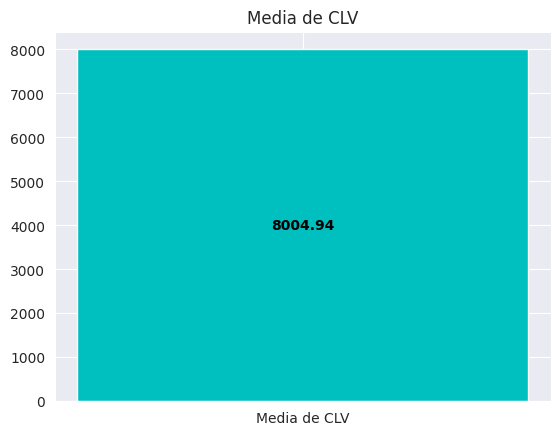

In [ ]:
fig, ax = plt.subplots()
bars = ax.bar(['Media de CLV'], [clv_media], color='c')

plt.title('Media de CLV')
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height/2 , f'{height:.2f}',
            ha='center', va='center', color='black', fontweight='bold')

plt.show()

vemos la media del clv

¿Cuál es el valor de vida del cliente por canal de adquisición?

In [ ]:
result = df['clv'].groupby(df['canal_de_ventas']).mean().round(2).reset_index(name='clv')
result

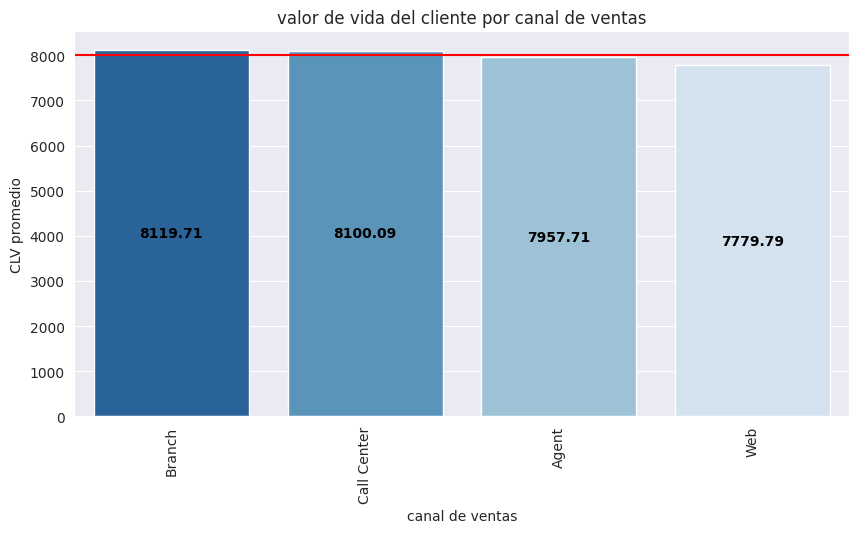

In [ ]:
orden_estados = result.sort_values(by='clv', ascending=False)['canal_de_ventas']
custom_palette = sns.color_palette("Blues_r", len(result))

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='canal_de_ventas', y='clv', data=result, palette=custom_palette, order=orden_estados)
plt.xticks(rotation=90)
plt.axhline(y=clv_media, color='red', linestyle='solid')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.4, p.get_height()/2),
                ha='center', va='center', color='black', fontweight='bold')

plt.xlabel('canal de ventas')
plt.ylabel('CLV promedio')
plt.title('valor de vida del cliente por canal de ventas')


plt.show()

vemos que el canal branch,Call center son los que tienen en CLV mas alto

¿Cuál es el valor de vida del cliente por producto?

In [ ]:
clientes_producto = df['clv'].groupby(df['poliza']).mean().reset_index(name='clv')
clientes_producto

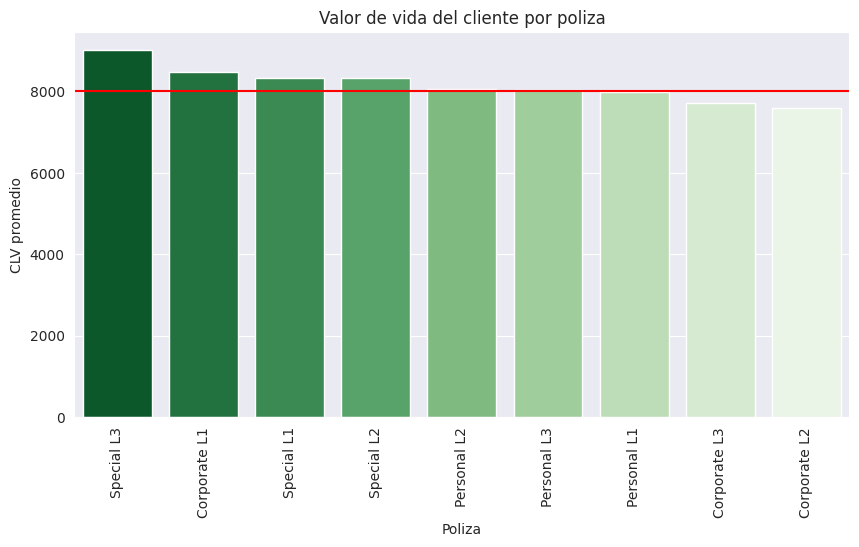

In [ ]:
orden_estados = clientes_producto.sort_values(by='clv', ascending=False)['poliza']
custom_palette = sns.color_palette("Greens_r", len(clientes_producto))

plt.figure(figsize=(10, 5))
sns.barplot(x='poliza', y='clv', data=clientes_producto, palette=custom_palette, order=orden_estados)
plt.xticks(rotation=90)
plt.axhline(y=clv_media, color='red', linestyle='solid')
plt.xlabel('Poliza')
plt.ylabel('CLV promedio')
plt.title('Valor de vida del cliente por poliza')


plt.show()

se puede ver que la poliza Special L3 es la que tiene el valor de CLV mas alto

¿Cuál es el valor de vida del cliente por mes de adquisición?

In [ ]:
mes_adquisicion = df['clv'].groupby(df['mes']).mean().round().reset_index(name='clv')
mes_adquisicion

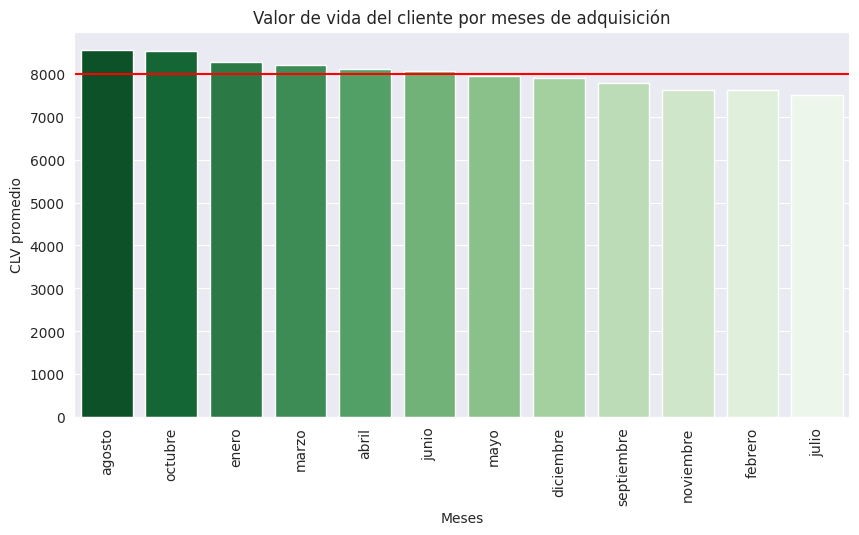

In [ ]:
orden_estados = mes_adquisicion.sort_values(by='clv', ascending=False)['mes']
custom_palette = sns.color_palette("Greens_r", len(mes_adquisicion))
plt.figure(figsize=(10, 5))
sns.barplot(x='mes', y='clv', data=mes_adquisicion,palette=custom_palette,order=orden_estados)
plt.xticks(rotation=90)

plt.axhline(y=clv_media, color='red', linestyle='solid')
plt.xlabel('Meses')
plt.ylabel('CLV promedio')
plt.title('Valor de vida del cliente por meses de adquisición')


plt.show()

Vemos que agosto y octubre son los meses donde el valor de clv son mejores respecto a los otros meses

¿Cuál es el valor de vida del cliente por mes de adquisición y canal de adquisición?

In [ ]:
mes_canal = df.groupby(['canal_de_ventas', 'mes'])['clv'].mean().reset_index(name='clv')
mes_canal

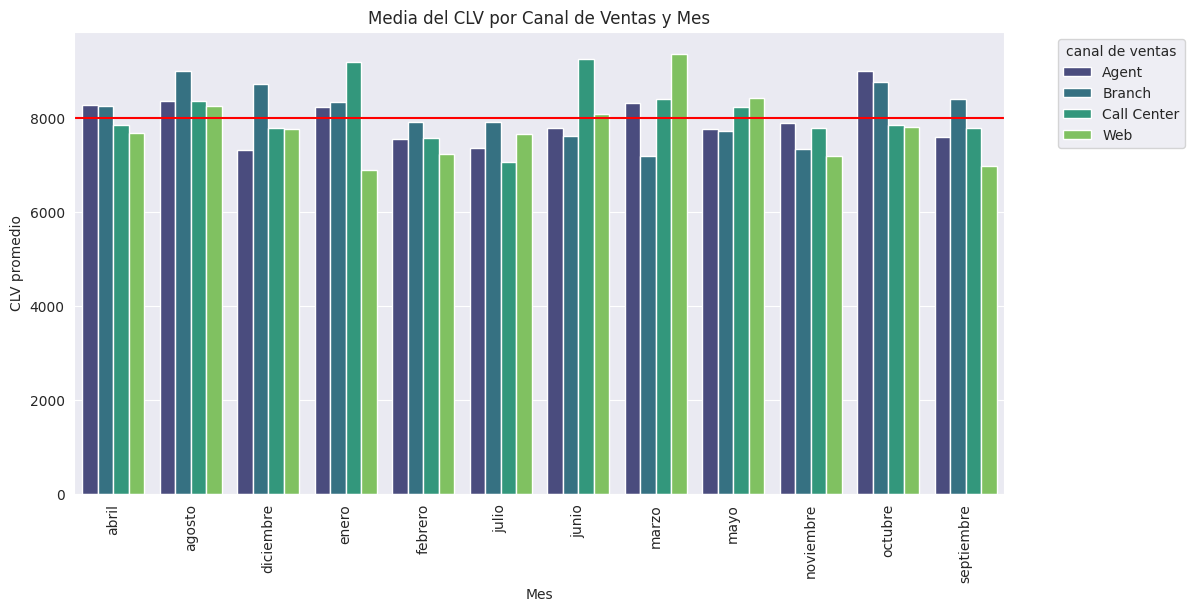

In [ ]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
sns.barplot(x='mes', y='clv', hue='canal_de_ventas', data=mes_canal, palette='viridis')


plt.legend(title='Canal de Ventas', loc='center')
plt.axhline(y=clv_media, color='red', linestyle='solid')
plt.title('Media del CLV por Canal de Ventas y Mes')
plt.xlabel('Mes')
plt.ylabel('CLV promedio')
plt.legend(title='canal de ventas', bbox_to_anchor=(1.05, 1), loc='upper left')
# Mostrar el gráfico
plt.show()


Se puede ver que en canal de ventas Branch es el canal de ventas que mas meses esta por encima de clv promedio





2parte

Valor de vida del cliente vs estado civil

In [ ]:
clv_estados = df.groupby(['estado_civil'])['clv'].mean().round().reset_index(name='clv')
clv_estados

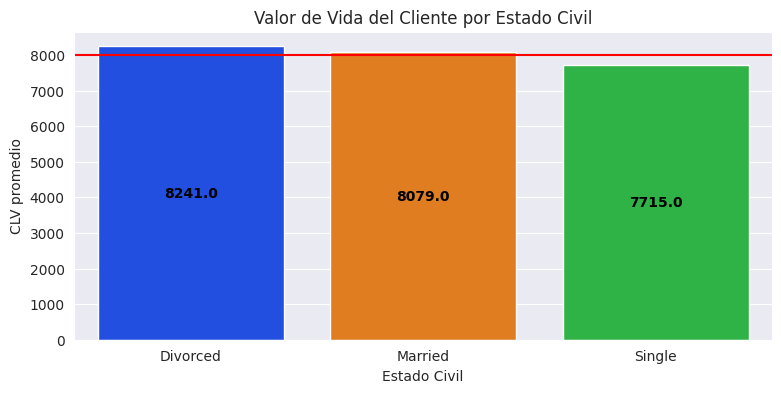

In [ ]:
plt.figure(figsize=(9, 4))
ax = sns.barplot(x='estado_civil', y='clv', data=clv_estados, palette='bright')
plt.axhline(y=clv_media, color='red', linestyle='solid')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.4, p.get_height()/2),
                ha='center', va='center', color='black', fontweight='bold')
ax.set_title('Valor de Vida del Cliente por Estado Civil')
ax.set_xlabel('Estado Civil')
ax.set_ylabel('CLV promedio')
plt.show()

en base al valor de vida del cliente y su estado civil vemos que los divorciados tienen el clv mas alto

Valor de vida del clientes vs estado civil ,sexo

In [ ]:
clv_sexo = df.groupby(['estado_civil' ,'genero'])['clv'].mean().round().reset_index(name='clv')
clv_sexo

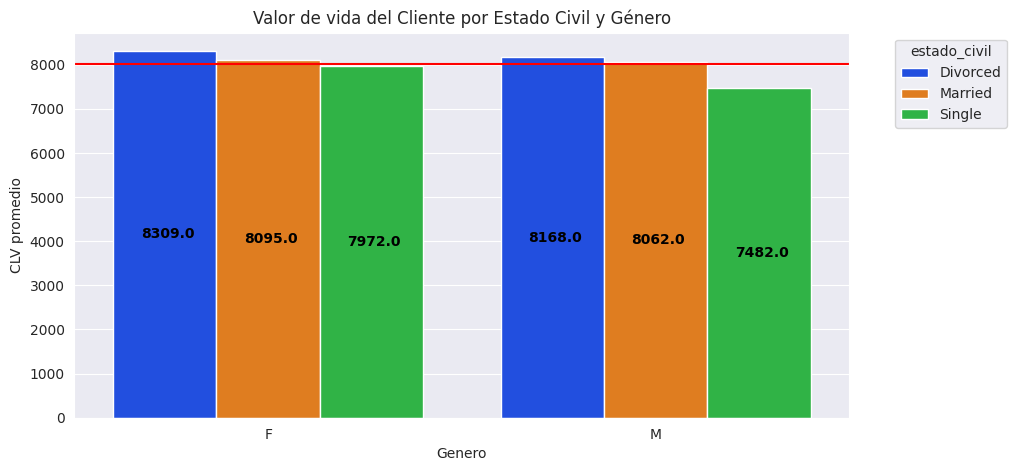

In [ ]:
plt.figure(figsize=(10, 5))

ax = sns.barplot(x='genero', y='clv', hue='estado_civil', data=clv_sexo, palette='bright')
plt.axhline(y=clv_media, color='red', linestyle='solid')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.14, p.get_height()/2),
                ha='center', va='center', color='black', fontweight='bold')
ax.set_title('Valor de vida del Cliente por Estado Civil y Género')
ax.set_xlabel('Genero')
ax.set_ylabel('CLV promedio')

plt.legend(title='estado_civil', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

aqui vemos que los hombres y mujeres divorciados son los que su clv son mas altos en comparacion al resto ,pero si vemos por genero las mujeres divorciadas tienen el clv mas alto  que los hombres divorciados

Valor de vida del cliente vs estado civil, producto

In [ ]:
clv_producto = df.groupby(['estado_civil','poliza'])['clv'].mean().reset_index(name='clv')
clv_producto

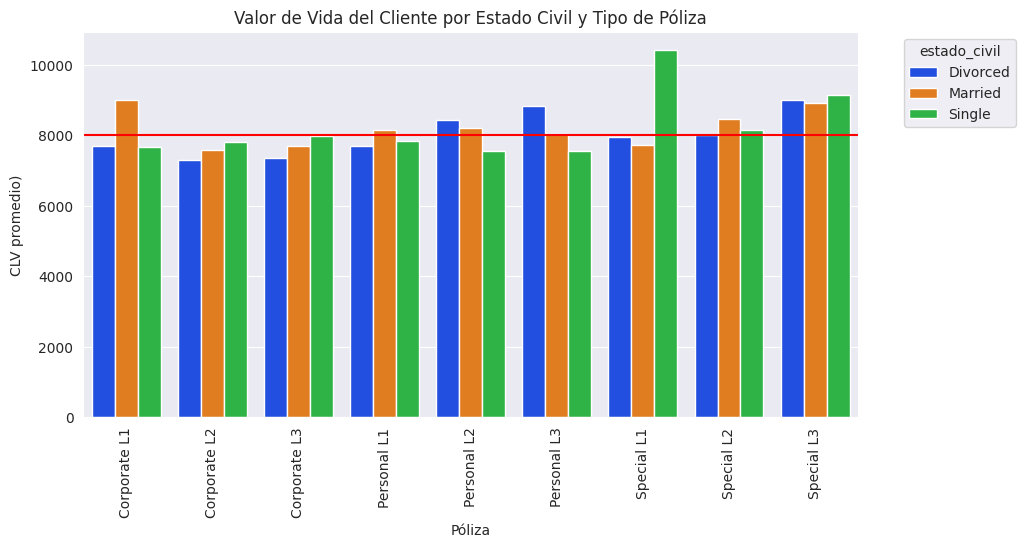

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='poliza', y='clv', hue='estado_civil', data=clv_producto, palette='bright', dodge=True)
plt.xticks(rotation=90)
ax.set_title('Valor de Vida del Cliente por Estado Civil y Tipo de Póliza')
ax.set_xlabel('Póliza')
ax.set_ylabel('CLV promedio)')
plt.axhline(y=clv_media, color='red', linestyle='solid')
plt.legend(title='estado_civil', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


vemos que que los casados y los divorciados son los que mas veces estan por encima del promedio del clv en cuanto a las polizas

Valor de vida del cliente  vs estado civil,canal de adquisicion

In [ ]:
clv_canal = df.groupby(['estado_civil','canal_de_ventas'])['clv'].mean().reset_index(name='clv')
clv_canal

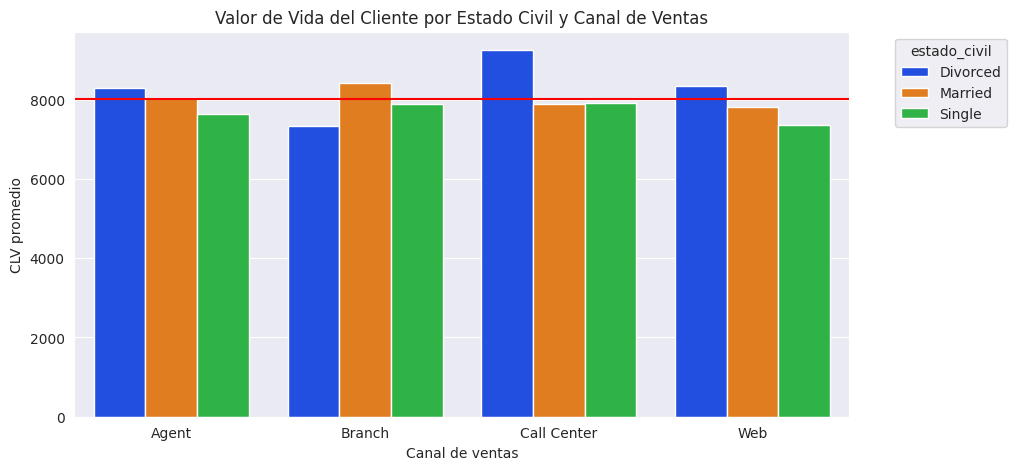

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='canal_de_ventas', y='clv', hue='estado_civil', data=clv_canal, palette='bright')
ax.set_title('Valor de Vida del Cliente por Estado Civil y Canal de Ventas')
ax.set_xlabel('Canal de ventas')
ax.set_ylabel('CLV promedio')
plt.axhline(y=clv_media, color='red', linestyle='solid')
plt.legend(title='estado_civil', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

los divorciados por canal de adquisicion siguen estando mas veces por encima del promedio del clv

Valor de vida del cliente vs  sexo,estado civil ,producto

In [ ]:
clv_genero_producto = df.groupby(['estado_civil','genero','poliza'])['clv'].mean().reset_index(name='clv')
clv_genero_producto

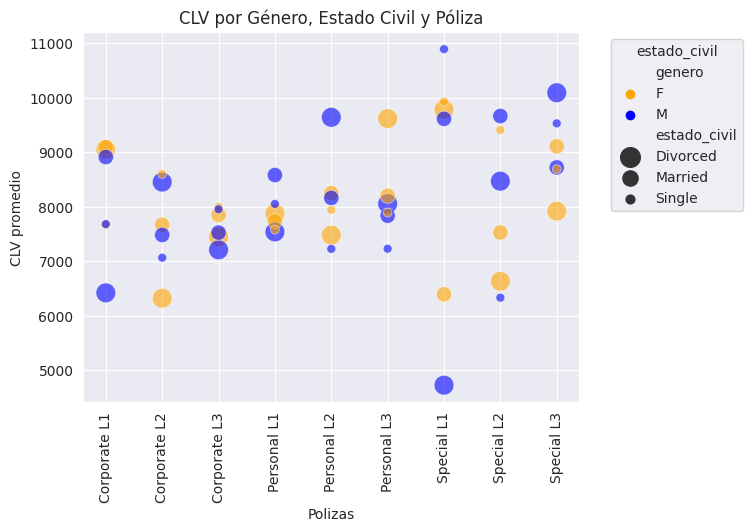

In [ ]:
color = {'M': 'blue', 'F': 'orange'}
sns.scatterplot(data=clv_genero_producto, x='poliza', y='clv', hue='genero', size='estado_civil',sizes=(40,200),alpha=0.6,palette =color)
plt.legend(title='estado_civil', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('CLV por Género, Estado Civil y Póliza')
plt.ylabel('CLV promedio')
plt.xlabel('Polizas')
plt.xticks(rotation=90)
plt.show()

se ve la distribucion  por estado civil ,genero y poliza  y vemos que los divorciados hombres y mujeres siguen estando en su mayoria por encima del promedio del clv

Valor de vida del cliente vs  estado_civil,sexo y canal de adquisición

In [ ]:
clv_genero_canal = df.groupby(['estado_civil','genero','canal_de_ventas'])['clv'].mean().reset_index(name='clv')
clv_genero_canal

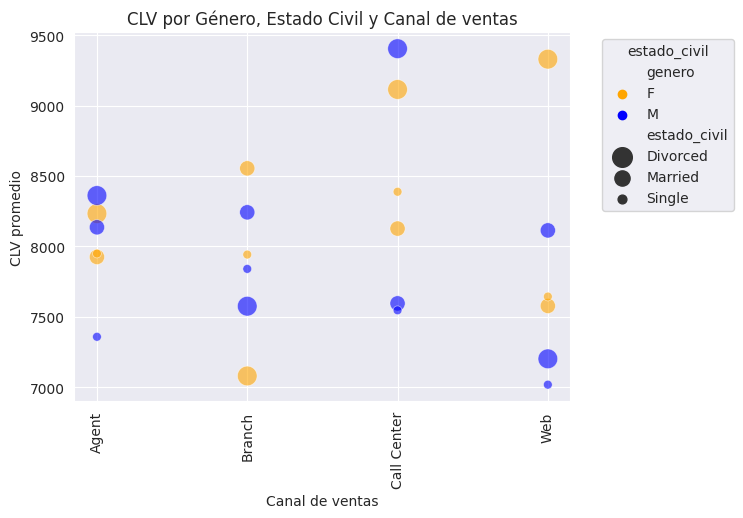

In [ ]:
color = {'M': 'blue', 'F': 'orange'}
sns.scatterplot(data=clv_genero_canal, x='canal_de_ventas', y='clv', hue='genero', size='estado_civil',sizes=(40,200),alpha=0.6,palette=color)
plt.legend(title='estado_civil', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('CLV por Género, Estado Civil y Canal de ventas')
plt.xticks(rotation=90)
plt.ylabel('CLV promedio')
plt.xlabel('Canal de ventas')
plt.show()

por canal de ventas vemos que la distribucion por debajo del clv promedio es bastante equilibrada en cuanto al estado civil  pero si vemos por encima del clv promedio los que mas se ven son los divorciados tanto hombres como mujeres

3Parte

Que tipo de clientes son los que más responden a las campañas de marketing

In [ ]:
tipo_clientes= df.groupby(['zona_de_residencia','respuesta_campañas_llamadas'])['id_del_cliente'].count().reset_index(name='id_del_cliente')
tipo_clientes

In [ ]:
color= {'No':'Red','Yes':'Green'}
plt.figure(figsize=(9, 5))
sns.barplot(x="zona_de_residencia", y="id_del_cliente", hue="respuesta_campañas_llamadas", data=tipo_clientes, palette=color)
plt.title('clientes que más responden a las campañas de marketing por zonas de residencia')
plt.xlabel('zona de residencia')
plt.ylabel('Número de Clientes')
plt.show()

buscando por zona de recidencia y numero de clientes que respondes a las llamadas vemos que en los suburbio es donde mas llamadas se atienden

vemos que los de los suburbios responden mas a los canales de ventas

In [ ]:
suburban_clientes= df.loc[df['zona_de_residencia'] == 'Suburban'].groupby(['estado_laboral','respuesta_campañas_llamadas'])['id_del_cliente'].count().reset_index(name='id_del_cliente')
suburban_clientes

In [ ]:
color = {'No': 'Red', 'Yes': 'Green'}
plt.figure(figsize=(9, 5))
sns.barplot(x="estado_laboral", y="id_del_cliente", hue="respuesta_campañas_llamadas", data=suburban_clientes, palette=color)
plt.title('Clientes segun su estado laboral y zona donde viven')
plt.xlabel('Estado Laboral')
plt.ylabel('Número de Clientes')
plt.show()

ahora buscamos por estado laboral y solo enfocado en los suburbios vemos que los retirados son los unicos donde la relacion en cuanto a las llamadas es positiva

buscando por el estado laboral los retirados dan mejor resultado en cuanto a la respuesta de llamada

In [ ]:
retirados_clientes = df.loc[(df['zona_de_residencia'] == 'Suburban') & (df['estado_laboral'] == 'Retired')].groupby(['genero', 'respuesta_campañas_llamadas'])['id_del_cliente'].count().reset_index(name='id_del_cliente')
retirados_clientes

In [ ]:
color = {'No': 'Red', 'Yes': 'Green'}
plt.figure(figsize=(9, 5))
sns.barplot(x="genero", y="id_del_cliente", hue="respuesta_campañas_llamadas", data=retirados_clientes, palette=color ,ci=None)
plt.title('Clientes retirados en la zona suburbana por Género')
plt.xlabel('Género')
plt.ylabel('Número de Clientes')
plt.show()

buscando ahora por genero unicamente de los retirados que vivan en los suburbios vemos tanto en hombres como mujeres una respuesta positiva a las llamadas

buscando por genero la relacion los hombres tienden a responder mas las llamadas pero la direfencia es leve con las mujeres

In [ ]:
retirados_clientes = df.loc[(df['zona_de_residencia'] == 'Suburban') & (df['estado_laboral'] == 'Retired')].groupby(['canal_de_ventas','genero', 'respuesta_campañas_llamadas'])['id_del_cliente'].count().reset_index(name='id_del_cliente')
retirados_clientes

In [ ]:
colores = {'No': 'Red', 'Yes': 'Green'}

plt.figure(figsize=(9, 5))
sns.barplot(x='canal_de_ventas', y='id_del_cliente', hue='respuesta_campañas_llamadas', data=retirados_clientes, palette=colores,ci=None)
plt.title('Clientes retirados en la zona suburbana por Canal de Ventas ')
plt.xlabel('Canal de Ventas')
plt.ylabel('Número de Clientes')


plt.show()

y por ultimo buscamos por canal de ventas y se puede ver que todos los canales tienen un respuesta positiva a exceptcion de call center

entocnes Si contactamos a traves del canal agent,branch o web a los retirados que vivan en los suburbios es mucho mas problable que se puedan realizar ventas con exito

Son los mismo graficos de arriba pero todos juntos para verlo de manera mucho mas facil ⬇️

<ipython-input-164-85163693aee1>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='genero', y='id_del_cliente', hue='respuesta_campañas_llamadas', data=retirados_clientes, palette=colores, ci=None, ax=axes[1, 0])
<ipython-input-164-85163693aee1>:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='canal_de_ventas', y='id_del_cliente', hue='respuesta_campañas_llamadas', data=retirados_clientes, palette=colores, ci=None, ax=axes[1, 1])


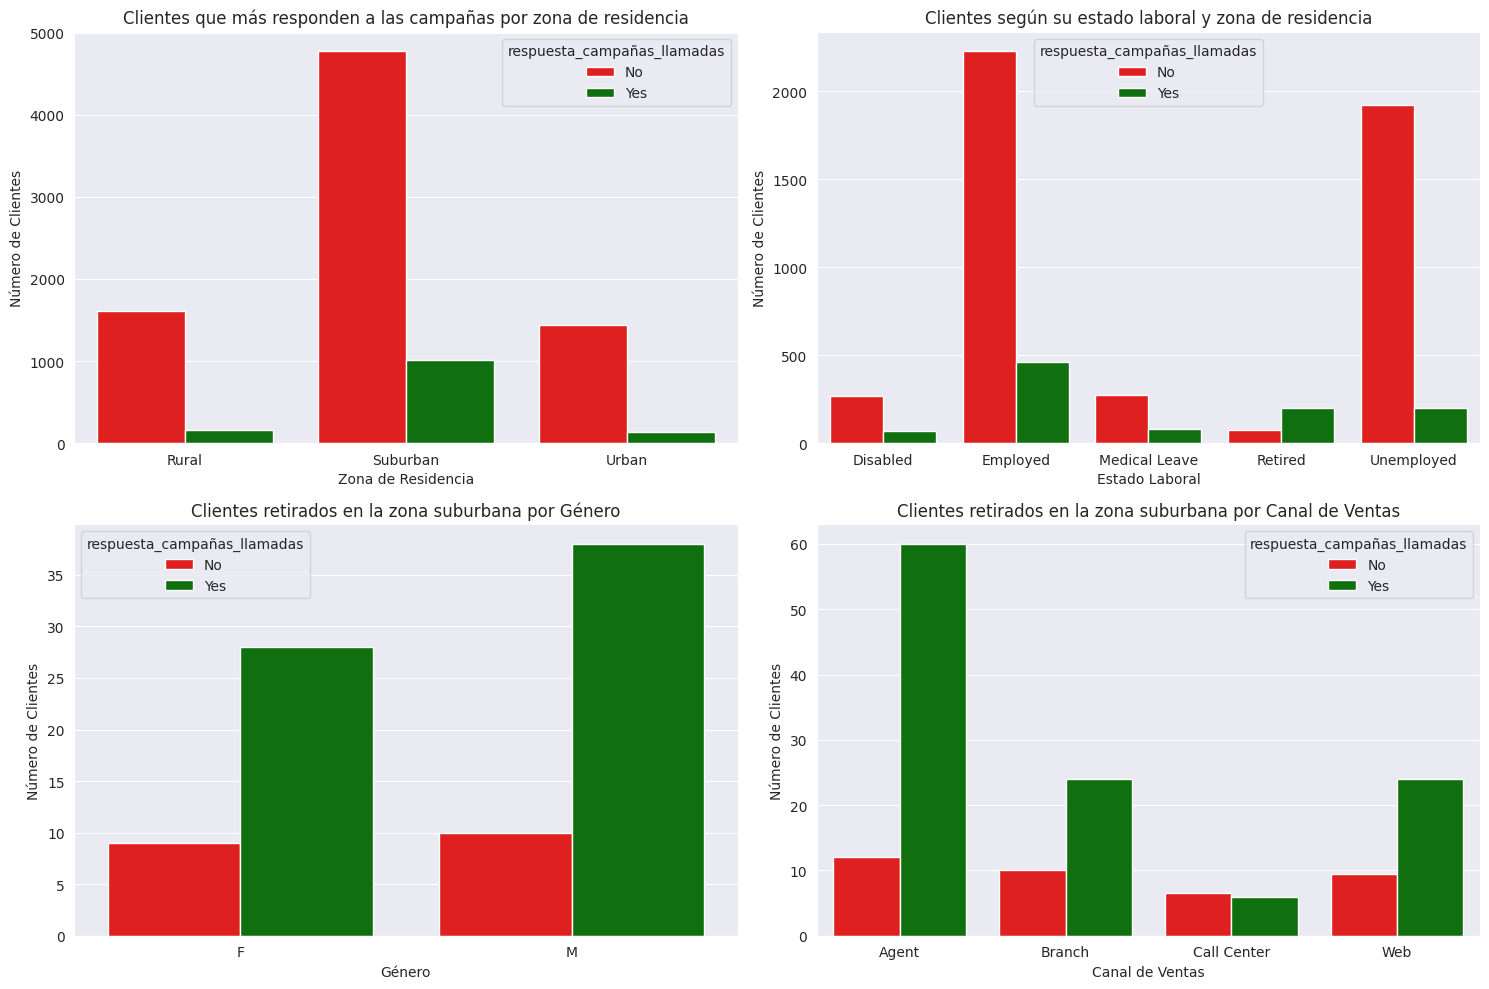

In [ ]:
# Definir la paleta de colores
colores = {'No': 'Red', 'Yes': 'Green'}

# Crear una figura con subgráficos en dos filas y dos columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Primer gráfico
sns.barplot(x='zona_de_residencia', y='id_del_cliente', hue='respuesta_campañas_llamadas', data=tipo_clientes, palette=colores, ax=axes[0, 0])
axes[0, 0].set_title('Clientes que más responden a las campañas por zona de residencia')
axes[0, 0].set_xlabel('Zona de Residencia')
axes[0, 0].set_ylabel('Número de Clientes')

# Segundo gráfico
sns.barplot(x='estado_laboral', y='id_del_cliente', hue='respuesta_campañas_llamadas', data=suburban_clientes, palette=colores, ax=axes[0, 1])
axes[0, 1].set_title('Clientes según su estado laboral y zona de residencia')
axes[0, 1].set_xlabel('Estado Laboral')
axes[0, 1].set_ylabel('Número de Clientes')

# Tercer gráfico
sns.barplot(x='genero', y='id_del_cliente', hue='respuesta_campañas_llamadas', data=retirados_clientes, palette=colores, ci=None, ax=axes[1, 0])
axes[1, 0].set_title('Clientes retirados en la zona suburbana por Género')
axes[1, 0].set_xlabel('Género')
axes[1, 0].set_ylabel('Número de Clientes')

# Cuarto gráfico
sns.barplot(x='canal_de_ventas', y='id_del_cliente', hue='respuesta_campañas_llamadas', data=retirados_clientes, palette=colores, ci=None, ax=axes[1, 1])
axes[1, 1].set_title('Clientes retirados en la zona suburbana por Canal de Ventas')
axes[1, 1].set_xlabel('Canal de Ventas')
axes[1, 1].set_ylabel('Número de Clientes')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.show()


---

¿Que campaña de marketing ha sido más efectiva?

In [ ]:
campaña_yes = df[df['respuesta_campañas_llamadas'] == 'Yes']
campaña_yes

filtro solo por las llamadas que sean yes

In [ ]:
campaña_canal= campaña_yes.groupby(['oferta_de_renovacion','respuesta_campañas_llamadas'])['id_del_cliente'].count().reset_index(name='id_del_cliente')
campaña_canal

<ipython-input-118-3c1ebfe05c6e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax= sns.barplot(x="oferta_de_renovacion", y="id_del_cliente", data=campaña_canal, color='Green', ci=None)


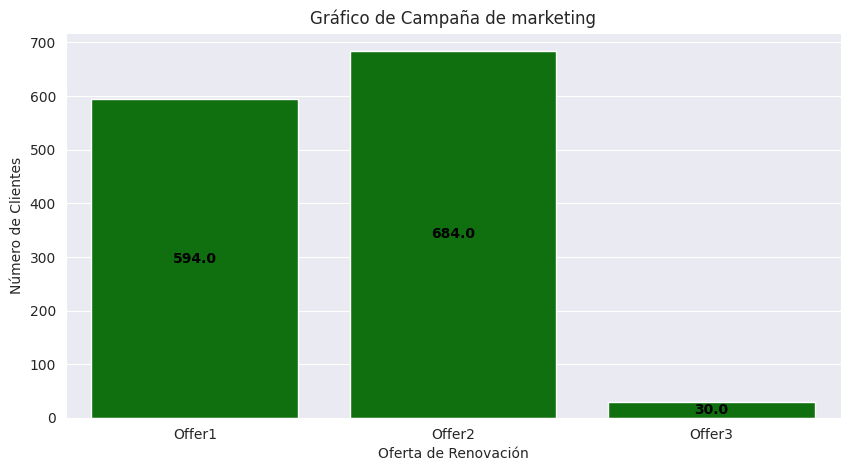

In [ ]:
plt.figure(figsize=(10, 5))
ax= sns.barplot(x="oferta_de_renovacion", y="id_del_cliente", data=campaña_canal, color='Green', ci=None)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.4, p.get_height()/2),
                ha='center', va='center', color='black', fontweight='bold')
plt.title('Gráfico de Campaña de marketing')
plt.xlabel('Oferta de Renovación')
plt.ylabel('Número de Clientes')


plt.show()

la oferta 2 es la que mas clientes aceptan

¿Que campaña de marketing ha sido más efectiva por canal de adquisición?

In [ ]:
campaña = campaña_yes.groupby(['canal_de_ventas', 'oferta_de_renovacion'])['id_del_cliente'].count().reset_index(name='id_del_cliente')
campaña

<ipython-input-120-3ce3d363afd5>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="oferta_de_renovacion", y="id_del_cliente", hue="canal_de_ventas", data=campaña, ci=None, palette="bright")


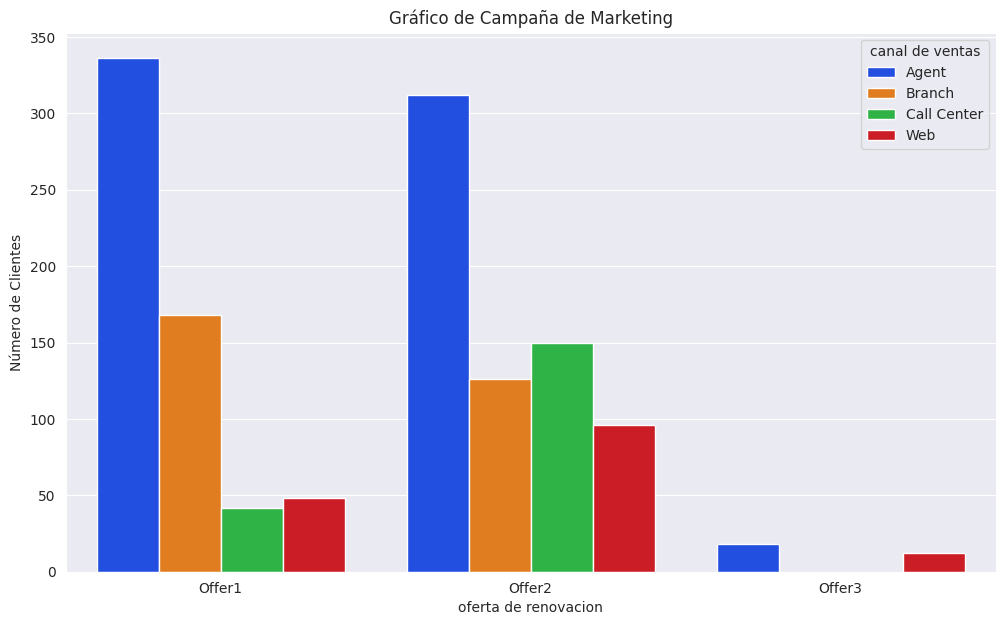

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x="oferta_de_renovacion", y="id_del_cliente", hue="canal_de_ventas", data=campaña, ci=None, palette="bright")
plt.title('Gráfico de Campaña de Marketing')
plt.xlabel('oferta de renovacion')
plt.ylabel('Número de Clientes')
plt.legend(title='canal de ventas', loc='upper right')

plt.show()


podemos ver que la campaña de oferta 1 y 2 ha nsido las mas efectivas en realciona la cantidad de clientes

¿Que campaña de marketing ha sido más efectiva por producto?

In [ ]:
campaña_producto= campaña_yes.groupby(['oferta_de_renovacion','poliza','respuesta_campañas_llamadas'])['id_del_cliente'].count().reset_index(name='id_del_cliente')
campaña_producto

<ipython-input-122-f95913cdd297>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='oferta_de_renovacion', y='id_del_cliente', hue='poliza', data=campaña_producto, ci=None, palette="muted")


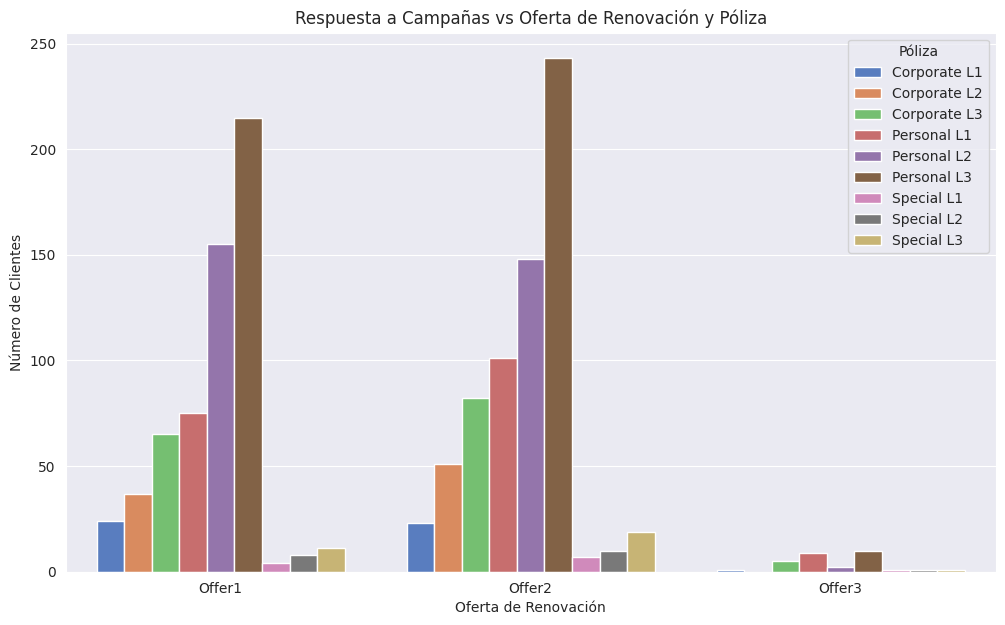

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x='oferta_de_renovacion', y='id_del_cliente', hue='poliza', data=campaña_producto, ci=None, palette="muted")
plt.title('Respuesta a Campañas vs Oferta de Renovación y Póliza')
plt.xlabel('Oferta de Renovación')
plt.ylabel('Número de Clientes')
plt.legend(title='Póliza', loc='upper right')

plt.show()

ahora vemos otra vez que las ofertas 1 y 2 son las mas efectivar y que la poliza 'personal L3' y la poliza 'personal L2' son las mas efectivas

¿Que campaña de marketing ha sido más efectiva por mes de adquisición?

In [ ]:
mes_campaña = campaña_yes.groupby(['oferta_de_renovacion','mes'])['id_del_cliente'].count().reset_index(name='id_del_cliente')
mes_campaña

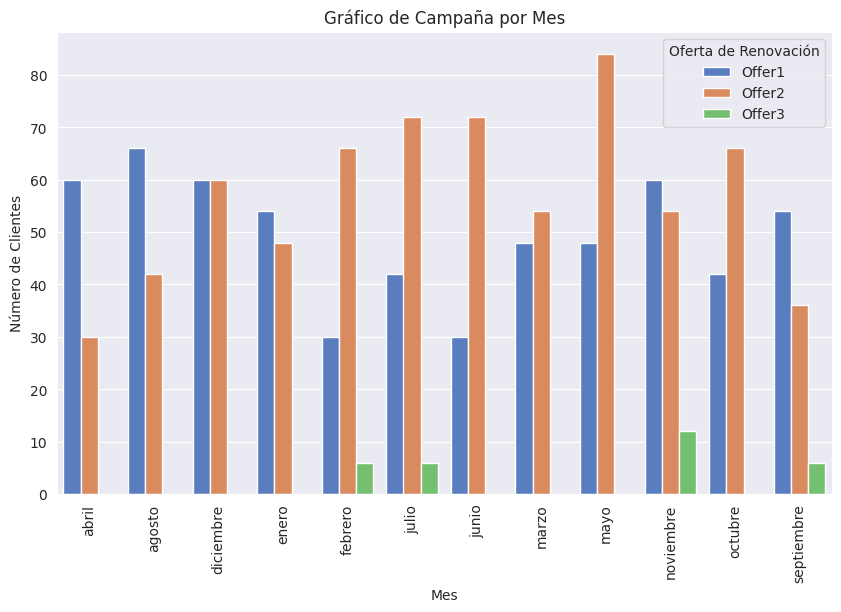

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="mes", y="id_del_cliente", hue="oferta_de_renovacion", data=mes_campaña, palette="muted" )
plt.xticks(rotation=90)
plt.title('Gráfico de Campaña por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Clientes')
plt.legend(title='Oferta de Renovación')
plt.show()


seguimos viendo que las ofertas 1 y 2 siguen siendo las mas efectivas ahora por mes

En conclusion se podria dedir que los clientes mas rentables o que mas facil podemos conseguir vender nuestros productos son los divorciados tanto hombres como mujeres a traves de cualquier canal de ventas y se podria empezar ofreciendo las ofertas 1 y 2 que son las mas aceptadas por nuestros clientes, tambien podriamos obtar por contactar con los retirados a traves de los canales de ventas como branch, agent  y web para poder conseguir clientes de manera positiva.

---

arreglar ese graficos en cuanto al count

In [ ]:
cantidad_poliza = df.groupby('estados')['num_de_polizas'].sum().reset_index(name='Cantidad Total de Pólizas')
cantidad_poliza

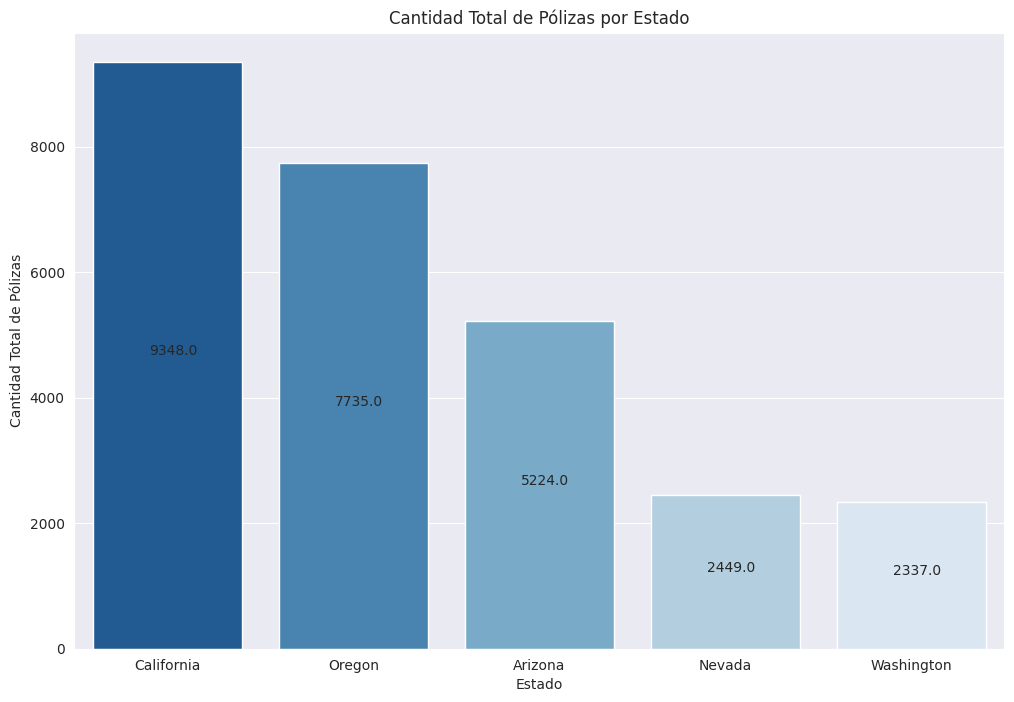

In [ ]:
plt.figure(figsize=(12, 8))
orden_estados = cantidad_poliza.sort_values(by='Cantidad Total de Pólizas', ascending=False)['estados']
custom_palette = sns.color_palette("Blues_r", len(cantidad_poliza))
ax = sns.barplot(x='estados', y='Cantidad Total de Pólizas', data=cantidad_poliza, palette=custom_palette, order=orden_estados)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()/2))
plt.title('Cantidad Total de Pólizas por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad Total de Pólizas')
plt.show()

In [ ]:
clientes_trabajo = df[df['estado_laboral'] != 'Unemployed'].groupby('estados').size().reset_index(name='clientes_no_desempleados')

In [ ]:
clientes_trabajo

,estados,clientes_no_desempleados
0,Arizona,1273
1,California,2346
2,Nevada,665
3,Oregon,1937
4,Washington,596


Clientes que tienen trabajo ( ingresos ) por cada estado

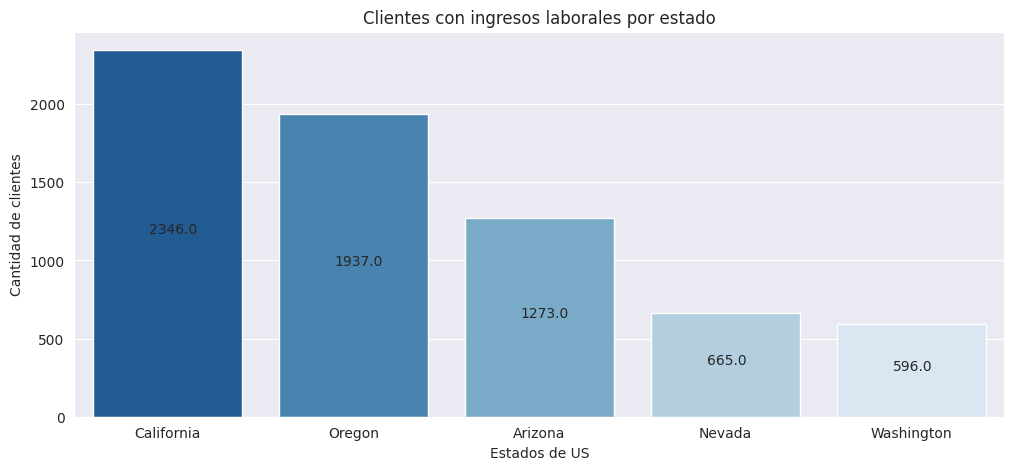

In [ ]:
orden_estados = clientes_trabajo.sort_values(by='clientes_no_desempleados', ascending=False)['estados']
# Crear una paleta de colores personalizada que vaya de oscuro a claro
custom_palette = sns.color_palette("Blues_r", len(orden_estados))

# Crear un gráfico de barras con Seaborn
plt.figure(figsize=(12, 5))
ax = sns.barplot(x='estados', y='clientes_no_desempleados', data=clientes_trabajo, palette=custom_palette, order=orden_estados)

# Añadir etiquetas a las barras
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()/2))

plt.xlabel('Estados de US')
plt.ylabel('Cantidad de clientes')
plt.title('Clientes con ingresos laborales por estado')

plt.show()
